In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Data Collection and Preprocessing

In [2]:
df=pd.read_csv('../Datasets/car_data.csv')

In [3]:
#Inspecting the first 5 rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Checking the number of rows and columns
df.shape

(301, 9)

In [5]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#Creating a new feature called car age 
df['Car_Age']=2023-df['Year']

In [7]:
#Dropping the year column
df.drop(labels='Year',axis=1,inplace=True)

In [8]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


# Data exploration and visualization

C:\Users\Tabishi Sinha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tabishi Sinha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tabishi Sinha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

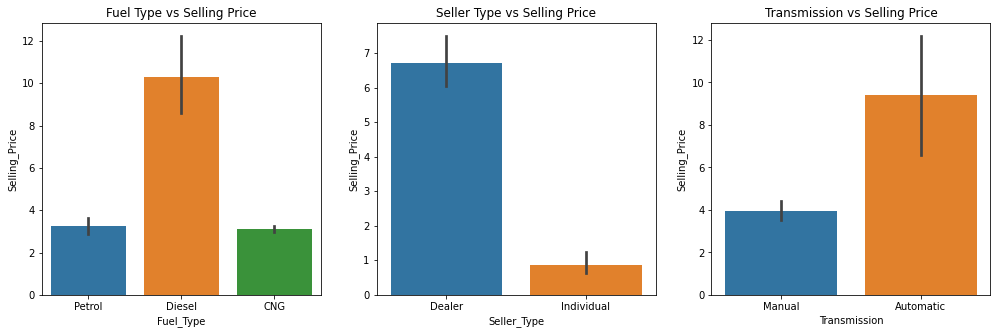

In [9]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['Fuel_Type'],df['Selling_Price'])
plt.title('Fuel Type vs Selling Price')
plt.subplot(1,3,2)
sns.barplot(df['Seller_Type'],df['Selling_Price'])
plt.title('Seller Type vs Selling Price')
plt.subplot(1,3,3)
sns.barplot(df['Transmission'],df['Selling_Price'])
plt.title('Transmission vs Selling Price')
plt.show()

C:\Users\Tabishi Sinha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tabishi Sinha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tabishi Sinha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

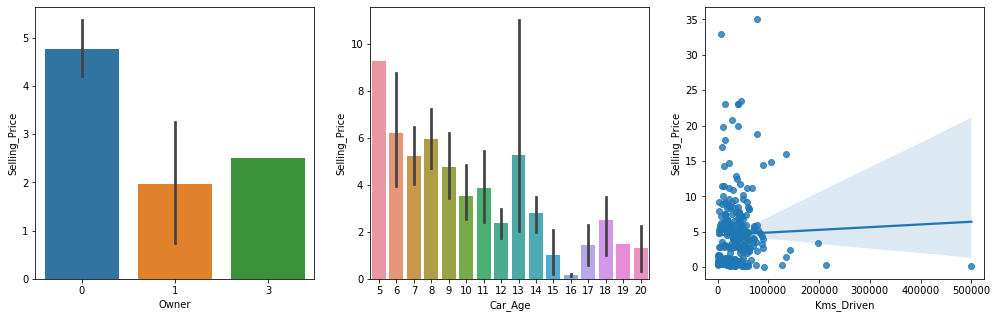

In [10]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['Owner'],df['Selling_Price'])

plt.subplot(1,3,2)
sns.barplot(df['Car_Age'],df['Selling_Price'])

plt.subplot(1,3,3)
sns.regplot(df['Kms_Driven'],df['Selling_Price'])
plt.show()

C:\Users\Tabishi Sinha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

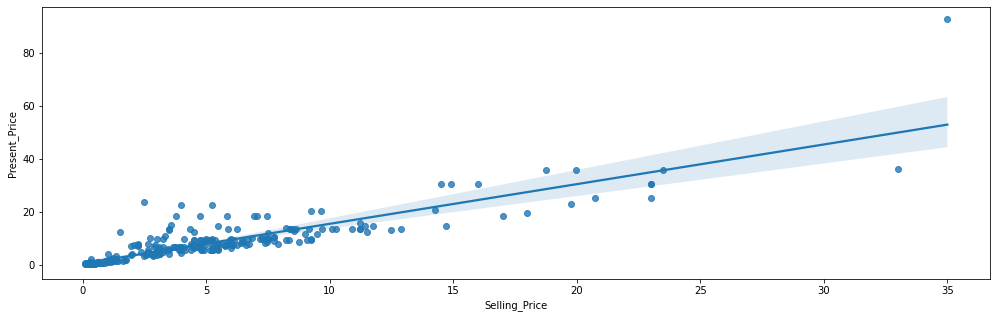

In [11]:
plt.figure(figsize=[17,5])
#plt.subplot(1,3,1)
sns.regplot(df['Selling_Price'],df['Present_Price'])

In [12]:
#Checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data


In [13]:
#Encoding the Fuel Type column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#Encoding the Seller Type column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#Encoding the Transmission column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [14]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


In [15]:
print(df.Car_Name.value_counts())

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


In [16]:
print(df['Car_Name'].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [17]:
#Dropping Car Name
df=df.drop(labels='Car_Name',axis=1)

In [18]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,0,0,0,0,9
1,4.75,9.54,43000,1,0,0,0,10
2,7.25,9.85,6900,0,0,0,0,6
3,2.85,4.15,5200,0,0,0,0,12
4,4.60,6.87,42450,1,0,0,0,9


Checking Multicollinearity using VIF

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Present_Price','Kms_Driven','Owner','Car_Age',
                        'Fuel_Type','Seller_Type','Transmission']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.980761,Present_Price
1,2.642756,Kms_Driven
2,1.065503,Owner
3,4.917474,Car_Age
4,1.595017,Fuel_Type
5,2.014915,Seller_Type
6,1.375525,Transmission


# Feature Selection

<AxesSubplot:>

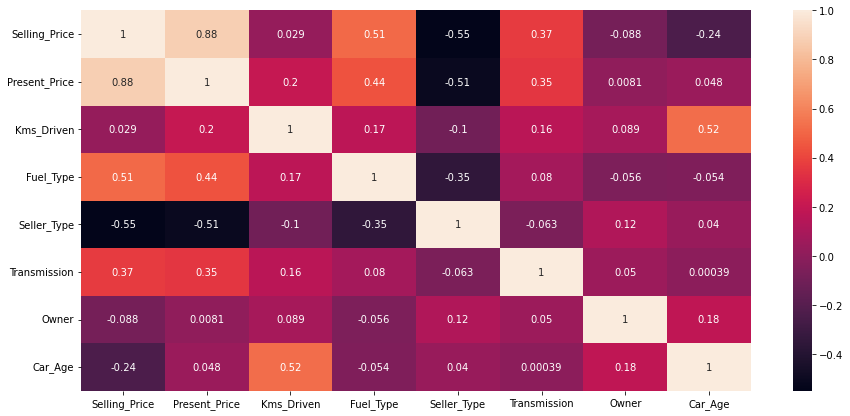

In [20]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(df.corr(), annot=True)

In [21]:
from sklearn.feature_selection import f_regression,SelectKBest

X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3)

array([0.   , 0.614, 0.   , 0.   , 0.   , 0.126, 0.   ])

In [24]:
# Creating summary table
model_summry = pd.DataFrame(data=['Present_Price', 'Owner', 'Car_age', 'Fuel_Type','Kms_Driven',
                              'Seller_Type', 'Transmission'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
print(model_summry)

        Features  p-values
0  Present_Price     0.000
1          Owner     0.614
2        Car_age     0.000
3      Fuel_Type     0.000
4     Kms_Driven     0.000
5    Seller_Type     0.126
6   Transmission     0.000


In [25]:
df=df.drop('Kms_Driven',axis=1)

In [26]:
#Owner column can be dropped as p-value>0.05
df=df.drop(labels='Owner',axis=1)

In [27]:
df.head()

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Car_Age
0,3.35,5.59,0,0,0,9
1,4.75,9.54,1,0,0,10
2,7.25,9.85,0,0,0,6
3,2.85,4.15,0,0,0,12
4,4.60,6.87,1,0,0,9


Model Development

In [28]:
#Selling Price will be the target variable
X=df.drop('Selling_Price',axis=1)
Y=df['Selling_Price']

In [29]:
print(X)

     Present_Price  Fuel_Type  Seller_Type  Transmission  Car_Age
0             5.59          0            0             0        9
1             9.54          1            0             0       10
2             9.85          0            0             0        6
3             4.15          0            0             0       12
4             6.87          1            0             0        9
..             ...        ...          ...           ...      ...
296          11.60          1            0             0        7
297           5.90          0            0             0        8
298          11.00          0            0             0       14
299          12.50          1            0             0        6
300           5.90          0            0             0        7

[301 rows x 5 columns]


In [30]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting training and test data

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# Model Training

1.Linear Regression

In [32]:
#Loading the linear regression model
lin_reg=LinearRegression()

In [33]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [34]:
#Model Evaluation
#Prediction on training data
training_data_prediction=lin_reg.predict(X_train)

In [35]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error of Linear Regression model: ",error_score)

R squared error of Linear Regression model:  0.8763973588104174


In [36]:
Accuracy=[]
Algorithm=[]
Accuracy.append(lin_reg.score(X_test,Y_test))
print(lin_reg.score(X_test,Y_test))

0.8531667630764618


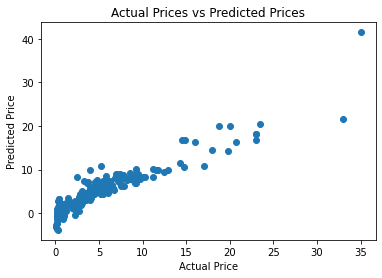

In [37]:
#Visualizing the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

2. Decision tree

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
predicted_tree = dtr.predict(X_test)
Accuracy.append(dtr.score(X_test,Y_test))
print(dtr.score(X_test,Y_test))

0.9200308367422829


3. SVM

In [39]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, Y_train)
predicted_svr = svr.predict(X_test)
Accuracy.append(svr.score(X_test,Y_test))
print(svr.score(X_test,Y_test))

0.9517021515415018


4. Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

Algorithm.append('RandomForestRegressor')
rfr = RandomForestRegressor(n_estimators = 100, random_state=0)
rfr.fit(X_train, Y_train)
predicted_forest = rfr.predict(X_test)
Accuracy.append(rfr.score(X_test,Y_test))
print(rfr.score(X_test,Y_test))

0.9835484635351849


Random Forest Regressor has the highest accuracy

In [41]:
import pickle
model=RandomForestRegressor
pickle.dump(model,open("CarPricePrediction.pkl",'wb'))